In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, beta, invgamma
%matplotlib inline

## Binomial

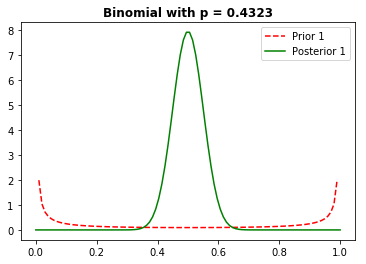

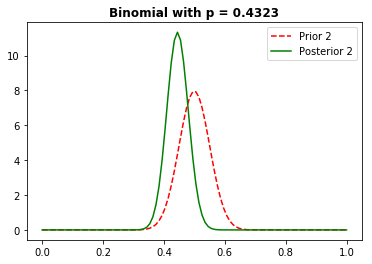

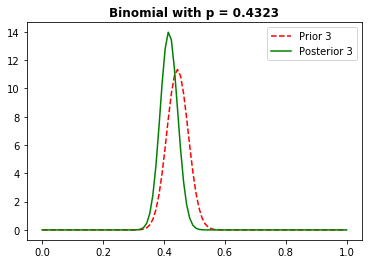

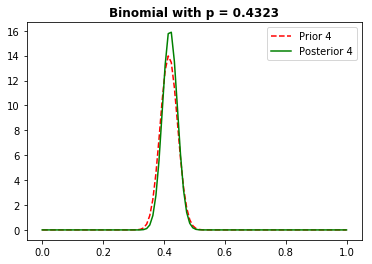

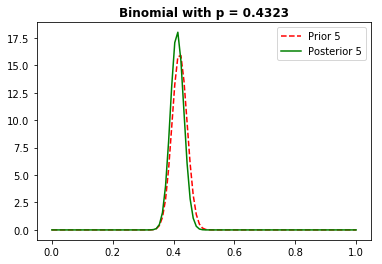

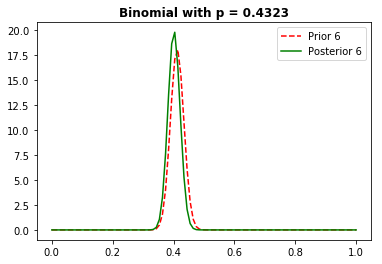

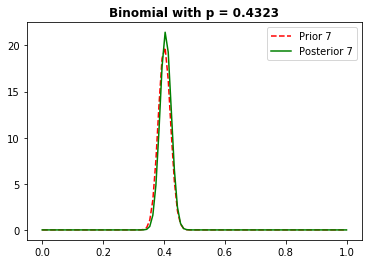

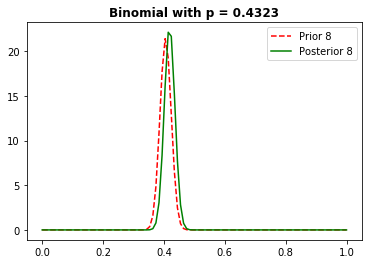

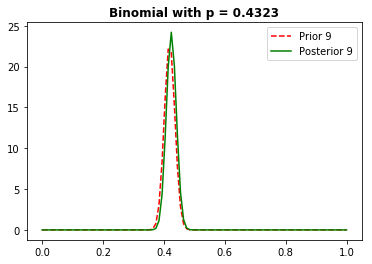

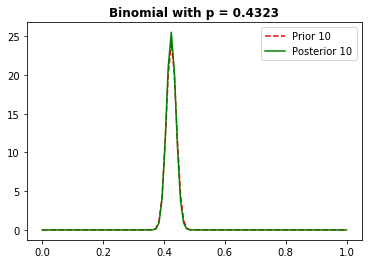

In [2]:
#data parameters
p = 0.4323
n_batch = 100
n_iter = 10

X = np.random.binomial(1, p, size=(n_iter, n_batch))  

#hyperparameters
a0 = 1/20
b0 = 1/20

#plot prior
x = np.linspace(0, 1, n_batch)
y0 = beta.pdf(x, a0, b0)       #initial prior

#update equations
update_a = a0
update_b = b0

for i in range(n_iter):
    update_a = update_a + sum(X[i])
    update_b = update_b + n_batch - sum(X[i])

    fig2 = plt.figure()
    ax21 = fig2.add_subplot(1, 1, 1)
    y1 = beta.pdf(x, update_a, update_b)
    ax21.plot(x, y0, 'r--', label='Prior {}'.format(i+1))
    ax21.plot(x, y1, 'g', label='Posterior {}'.format(i+1))
    handles2, labels2 = ax21.get_legend_handles_labels()
    ax21.legend(handles2, labels2)
    ax21.set_title('Binomial with p = {}'.format(p), fontweight='bold')
    
    y0 = y1

## Known Mean, Unkown Variance

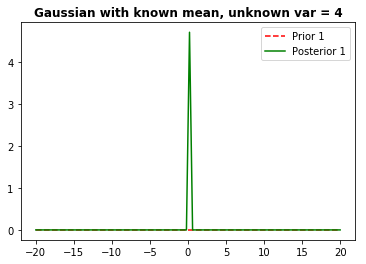

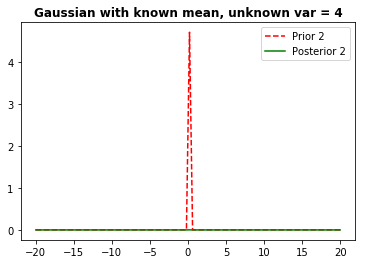

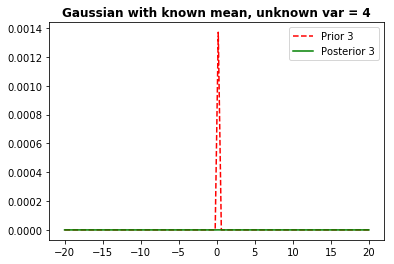

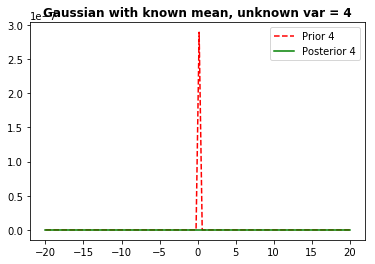

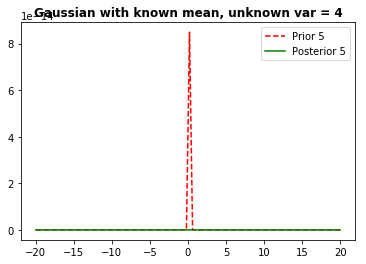

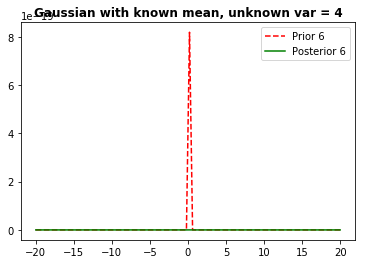

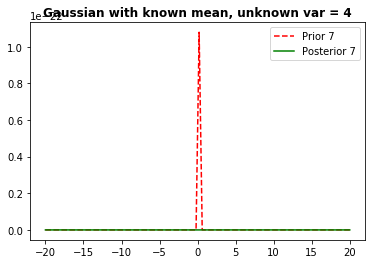

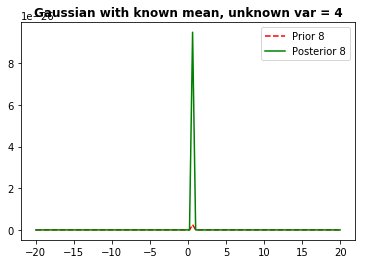

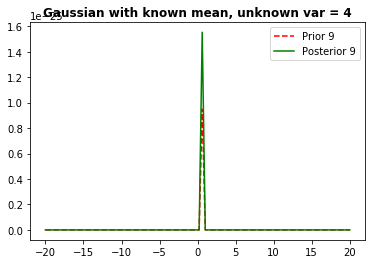

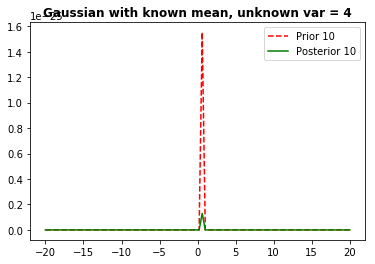

In [3]:
mu = 0 
sigma = 2

n_batch = 100 
n_iter = 10

X_normal = np.random.normal(mu, sigma, size=(n_iter, n_batch)) 

a0 = 100
b0 = 10

x = np.linspace(mu - 10 * sigma, mu + 10 * sigma, n_batch)
y0 = invgamma.pdf(x, a=a0, scale=b0)      

update_a = a0
update_b = b0
for i in range(n_iter):
    samp_var = sum((X[i] - mu)**2)
    
    update_a = update_a + n_batch / 2
    update_b = update_b + (samp_var/2)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    y1 = invgamma.pdf(x, a=update_a, scale=update_b)
    ax.plot(x, y0, 'r--', label='Prior {}'.format(i+1))
    ax.plot(x, y1, 'g', label='Posterior {}'.format(i+1))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.set_title('Gaussian with known mean, unknown var = {}'.format(sigma**2), fontweight='bold')

    y0 = y1

## Known Variance, Unknown Mean

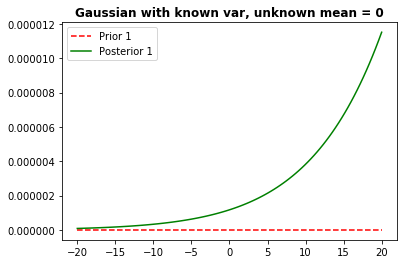

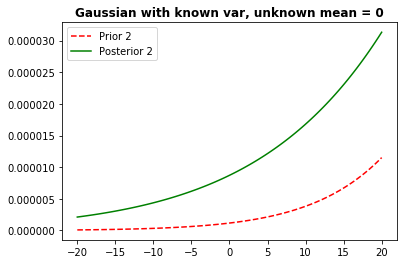

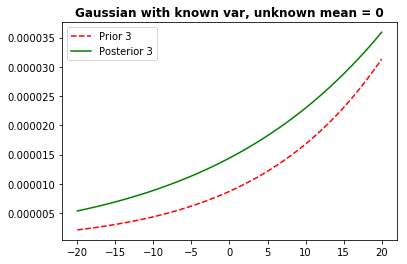

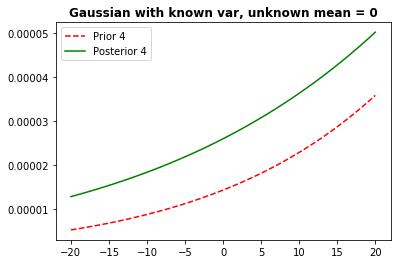

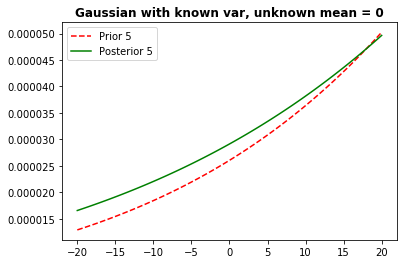

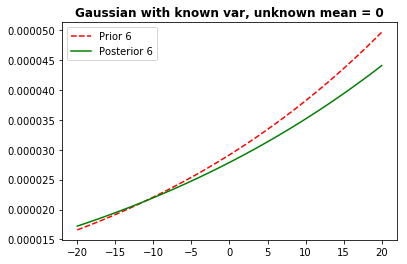

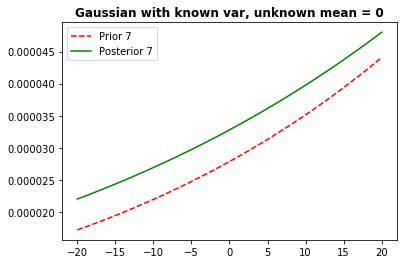

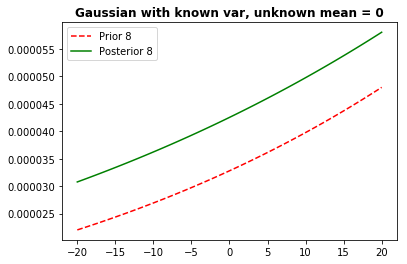

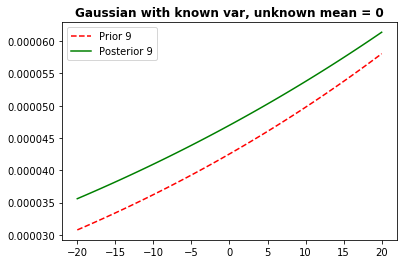

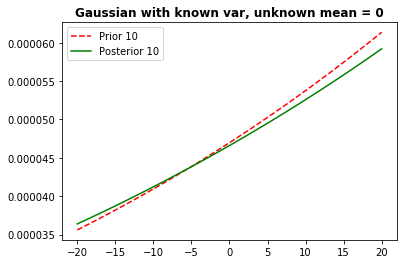

In [4]:
a0 = 100
b0 = 10

y0 = norm.pdf(x, loc=a0, scale=b0)      

update_a = a0
update_b = b0
for i in range(n_iter):
    samp_var = sum((X[i] - mu)**2)
    
    update_a = update_a + n_batch / 2
    update_b = update_b + (samp_var/2)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    y1 = norm.pdf(x, loc=update_a, scale=update_b)
    ax.plot(x, y0, 'r--', label='Prior {}'.format(i+1))
    ax.plot(x, y1, 'g', label='Posterior {}'.format(i+1))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.set_title('Gaussian with known var, unknown mean = {}'.format(mu), fontweight='bold')

    y0 = y1